In [44]:
import pandas as pd

In [45]:
data = pd.read_excel("/content/sentiment_beto_sample_bukele (1).xlsx")

In [46]:
data.head(1)

,Post Type,Profile Name,Date,Time,Likes,Text,AP,AP + JA Revised,sentiment_output,sentiment_probability,English Text (Google Translate),Match
0,Astronaut Post,Elizabeth Menjivar,2024-04-13,03:29:29,43,Dios lo bendiga por ser un gran ser humano,POS,POS,POS,0.997756,God bless him for being a great human being.,True


In [47]:
print(data.isnull().sum())

Post Type                          0
Profile Name                       0
Date                               0
Time                               0
Likes                              0
Text                               0
AP                                 0
AP + JA Revised                    4
sentiment_output                   0
sentiment_probability              0
English Text (Google Translate)    0
Match                              0
dtype: int64


In [48]:
null_rows = data[data['AP + JA Revised'].isnull()]

print(null_rows)

                 Post Type       Profile Name        Date      Time  Likes  \
64          Astronaut Post     Julio Guerrero  2024-04-15  04:29:42      0   
72          Astronaut Post       Victor Velez  2024-04-14  05:01:12      0   
148                   Reel        Carlos Díaz  2024-04-18  00:53:50      7   
332  Google en El Salvador  Alejandra Rugerio  2024-04-18  05:23:21      0   

                                                  Text   AP AP + JA Revised  \
64   Guadalupe Ayala si y que siga  la dominacion’ ...  NEG             NaN   
72   Sara Cespedes porque se comen tanto la letra “...  NEG             NaN   
148  Allí es donde yo digo jefes a muchísimos,  líd...  NEU             NaN   
332  Cristian Morales Quesada México  está igual ya...  NEG             NaN   

    sentiment_output  sentiment_probability  \
64               POS               0.980958   
72               NEU               0.727363   
148              NEG               0.995871   
332              NEU     

In [49]:
data = data.dropna(subset=['AP + JA Revised'])
print(data.isnull().sum())

Post Type                          0
Profile Name                       0
Date                               0
Time                               0
Likes                              0
Text                               0
AP                                 0
AP + JA Revised                    0
sentiment_output                   0
sentiment_probability              0
English Text (Google Translate)    0
Match                              0
dtype: int64


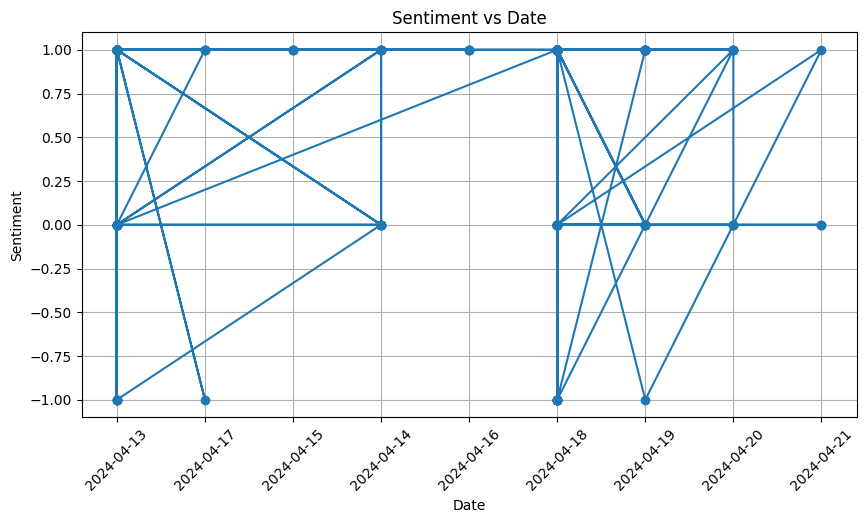

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
sentiment_mapping = {"POS": 1, "NEU": 0, "NEG": -1}
data['Sentiment_Value'] = data['sentiment_output'].map(sentiment_mapping)
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Sentiment_Value'], marker='o', linestyle='-')
plt.title('Sentiment vs Date')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


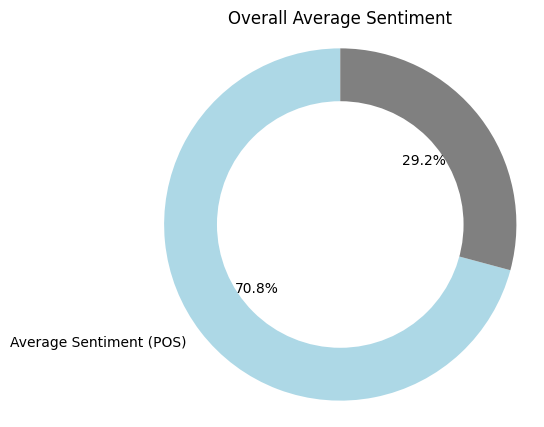

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

sentiment_mapping = {"POS": 1, "NEU": 0, "NEG": -1}
data['Sentiment_Value'] = data['sentiment_output'].map(sentiment_mapping) # Mapping
overall_avg_sentiment = data['Sentiment_Value'].mean()

def map_sentiment(sentiment_value):
    if sentiment_value > 0:
        return "POS"
    elif sentiment_value < 0:
        return "NEG"
    else:
        return "NEU"

overall_sentiment_label = map_sentiment(overall_avg_sentiment) # Mapping avg sentiment value to nearest label

labels = [f'Average Sentiment ({overall_sentiment_label})', '']
sizes = [overall_avg_sentiment, 1 - overall_avg_sentiment]#donut plot for average sentiment
colors = ['lightblue', 'Grey']
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Overall Average Sentiment')
plt.axis('equal')
plt.show()
